#**LOAN STATUS PREDICTION**
-**ASTER NATHAN**

In [ ]:
# IMPORTING LIBRARIES/DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split

In [ ]:
#LOADING DATA
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

The columns tells the difference between the Train and the Test Dataset and excludes the 'Loan_Status' from the test dataset

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_data.shape

(614, 13)

In [ ]:
test_data.shape

(367, 12)

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are Missing Values in Gender, Married, Dependents, Self_Employed, LoanAmount ,Loan_Amount_Term and Credit_History.

We will treat Null Values for Categorical variables like Gender, Married, Dependents, Credit_History and Self_Employed features using mode()

And will treat Null values for numerical variables using median()

In [ ]:
#FILLING THE NULL VALUES WITH 'mode()' and 'median()' in train dataset
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)
train_data['Education'].fillna(train_data['Education'].mode()[0], inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)
train_data['CoapplicantIncome'].fillna(train_data['CoapplicantIncome'].mean(), inplace = True)
train_data['ApplicantIncome'].fillna(train_data['ApplicantIncome'].mean(), inplace = True)
#FILLING THE 'Loan_Amount_Term' WITH 'mode()' AND 'LoanAmount' WITH 'median()'
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace = True)
train_data['Loan_Status'].fillna(0, inplace = True)
train_data['Property_Area'].fillna(train_data['Property_Area'].mode()[0], inplace = True)

In [ ]:
train_data['Credit_History'].nunique()

2

In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
print(train_data['Loan_Status'])

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object


In [ ]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

There appears to be some Missing/Null values in the test_data. Treating them with 'mode()' and median() too

In [ ]:
#FILLING THE NULL VALUES WITH 'mode()' and 'median()'
test_data['Gender'].fillna(test_data['Gender'].mode()[0], inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0], inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0], inplace = True)
test_data['Credit_History'].fillna(0, inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mode()[0], inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].median(), inplace = True)

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


THE DATA IS NOW FREE OF NULL VALUES AND CAN BE USED FOR FURTHER ANALYSIS

#CONVERTING TEXT/CATEGORICAL VARIABLES INTO NUMERICAL VARIABLES

In [ ]:
#LETS REPLACE THE CATEGORICAL/STRING VALUES
train_data['Married'].replace('Yes',1,inplace=True)
train_data['Married'].replace('No',0,inplace=True)
test_data['Married'].replace('Yes',1,inplace=True)
test_data['Married'].replace('No',0,inplace=True)

In [ ]:
train_data['Loan_Status'].replace('Y',1,inplace=True)
train_data['Loan_Status'].replace('N',0,inplace=True)
train_data['Gender'].replace('Male',1,inplace=True)
train_data['Gender'].replace('Female',0,inplace=True)
train_data['Property_Area'].replace('Rural',1,inplace=True)
train_data['Property_Area'].replace('Urban',0,inplace=True)
train_data['Property_Area'].replace('Semiurban',2,inplace=True)
train_data['Education'].replace('Graduate',1,inplace=True)
train_data['Education'].replace('Not Graduate',0,inplace=True)
test_data['Education'].replace('Graduate',1,inplace=True)
test_data['Education'].replace('Not Graduate',0,inplace=True)

In [ ]:
train_data['Self_Employed'].replace('Yes',1,inplace=True)
train_data['Self_Employed'].replace('No',0,inplace=True)
test_data['Self_Employed'].replace('Yes',1,inplace=True)
test_data['Self_Employed'].replace('No',0,inplace=True)

In [ ]:
test_data['Gender'].replace('Male',1,inplace=True)
test_data['Gender'].replace('Female',0,inplace=True)
test_data['Property_Area'].replace('Rural',1,inplace=True)
test_data['Property_Area'].replace('Urban',0,inplace=True)
test_data['Property_Area'].replace('Semiurban',2,inplace=True)

**VISUALIZING VARIABLES INDIVIDUALLY**

In [ ]:
train_data['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

<Axes: title={'center': 'Loan_Status'}>

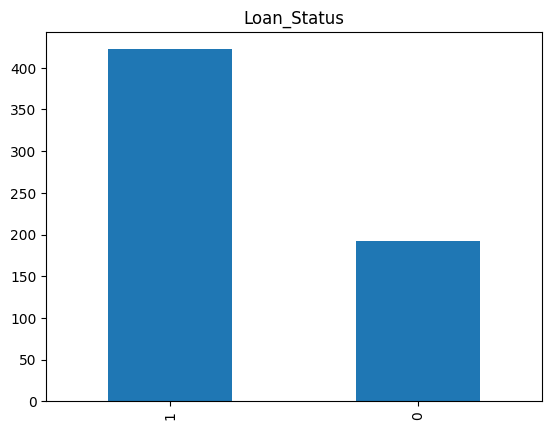

In [ ]:
train_data['Loan_Status'].value_counts(normalize = False).plot.bar(title = 'Loan_Status')

<Axes: title={'center': 'Gender'}>

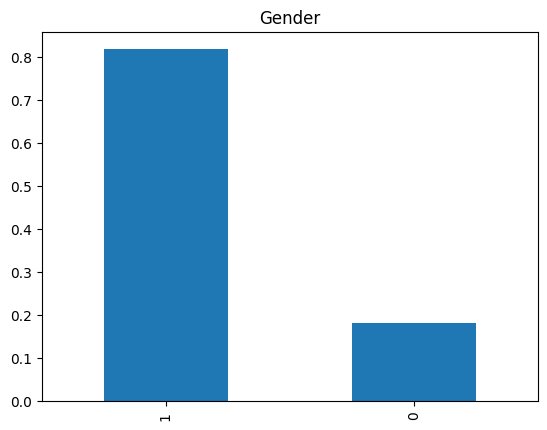

In [ ]:
train_data['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

The visualization gives us an insight that more than **80%** of the Loan Applicants are **Male** and only **20%** are **Female**

In [ ]:
train_data['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

<Axes: title={'center': 'Married'}>

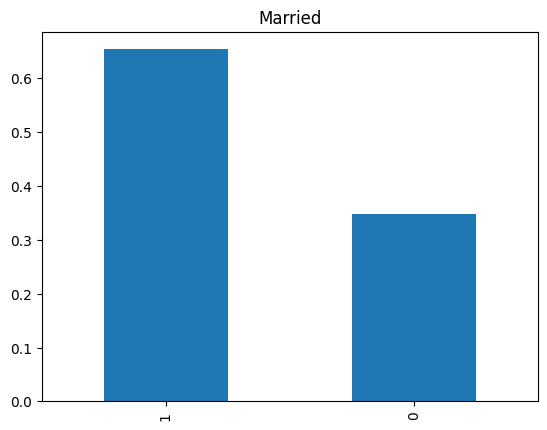

In [ ]:
train_data['Married'].value_counts(normalize = True).plot.bar(title='Married')

The Visual gives us an insight that around **65%** of the Loan Applicants are **Married** and **35%** are **Unmarried**

In [ ]:
train_data['Self_Employed'].nunique()

2

<Axes: title={'center': 'Self_Employed'}>

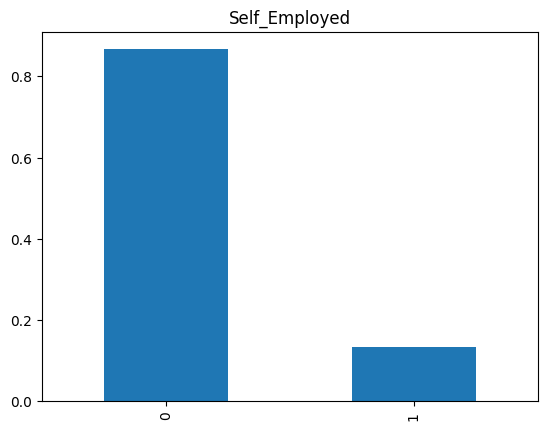

In [ ]:
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed')

The visualization gives us an insight that only **15%** of the Loan Applicants are **Self_Employed**

In [ ]:
train_data['Credit_History'].nunique()

2

<Axes: title={'center': 'Credit_History'}>

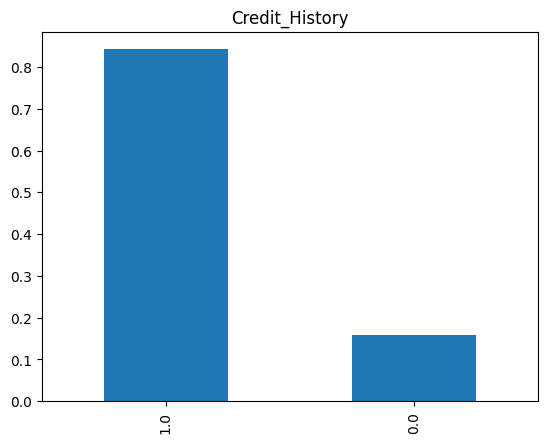

In [ ]:
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [ ]:
train_data['Credit_History'].replace('No',0.0,inplace=True)

In [ ]:
train_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<Axes: title={'center': 'Credit_History'}>

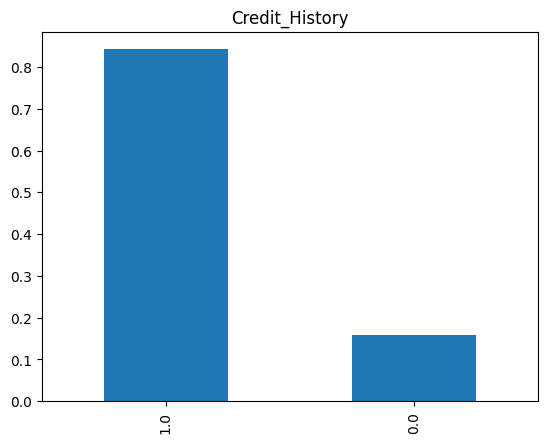

In [ ]:
train_data['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit_History')

The Visualization shows that more than **80%** of the Applicants **Have repaid their previous Loans** and **20%** of the Applicants **Have either not paid their Loans or do not have a Credit History**

In [ ]:
train_data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train_data['Dependents'].replace('3+',3,inplace=True)
test_data['Dependents'].replace('3+',3,inplace=True)

<Axes: title={'center': 'No. of Dependents'}>

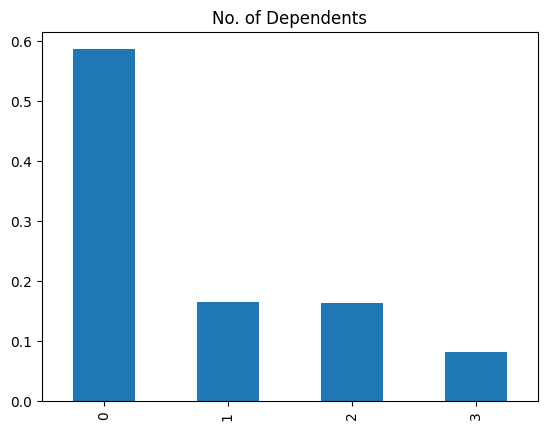

In [ ]:
train_data['Dependents'].value_counts(normalize=True).plot.bar(title = 'No. of Dependents')

The Visual gives us an insight that approximately **60%** of the Loan Applicants do not have any **Dependents**, **15%** have **1 Dependent**, another **15%** have **2 Dependents** and **10%** have **3 or more than 3 Dependents**

In [ ]:
train_data['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

<Axes: title={'center': 'Education'}>

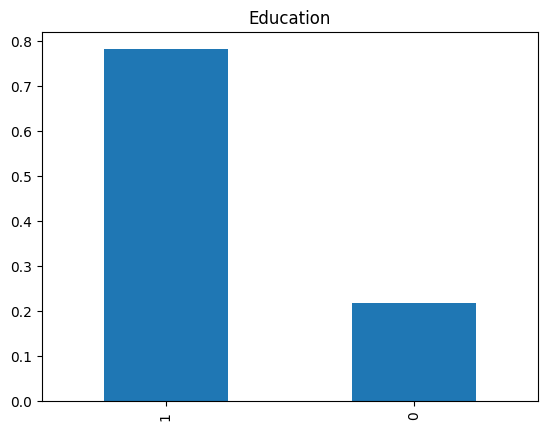

In [ ]:
train_data['Education'].value_counts(normalize=True).plot.bar(title = 'Education')

The Visualization gives us an insight that approximately **80%** of the Loan Applicants are **Graduates** and **20%** of the Applicants are **Non-Graduates**

In [ ]:
train_data['Property_Area'].value_counts()

2    233
0    202
1    179
Name: Property_Area, dtype: int64

<Axes: title={'center': 'Applicant Area'}>

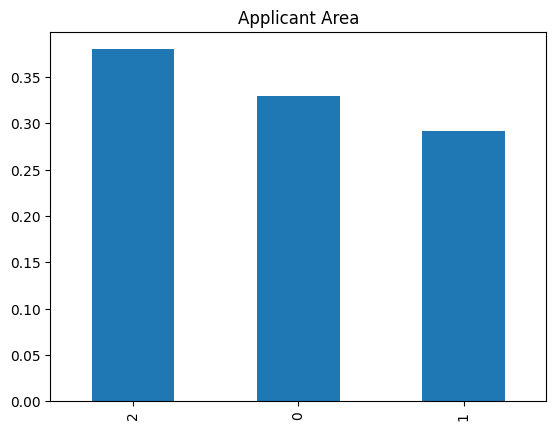

In [ ]:
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Applicant Area')

The visualization gives us an insight that most of the people applied for a Loan belong to the **Semi-Urban** Area

#VISUALIZING NUMERICAL/INDEPENDENT VARIABLE

<ipython-input-42-9981289f33af>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['ApplicantIncome'])


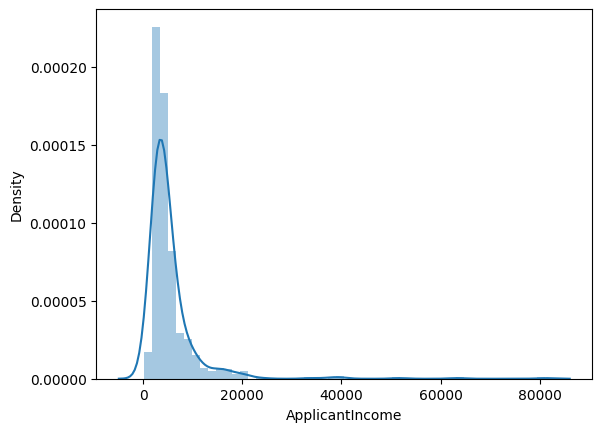

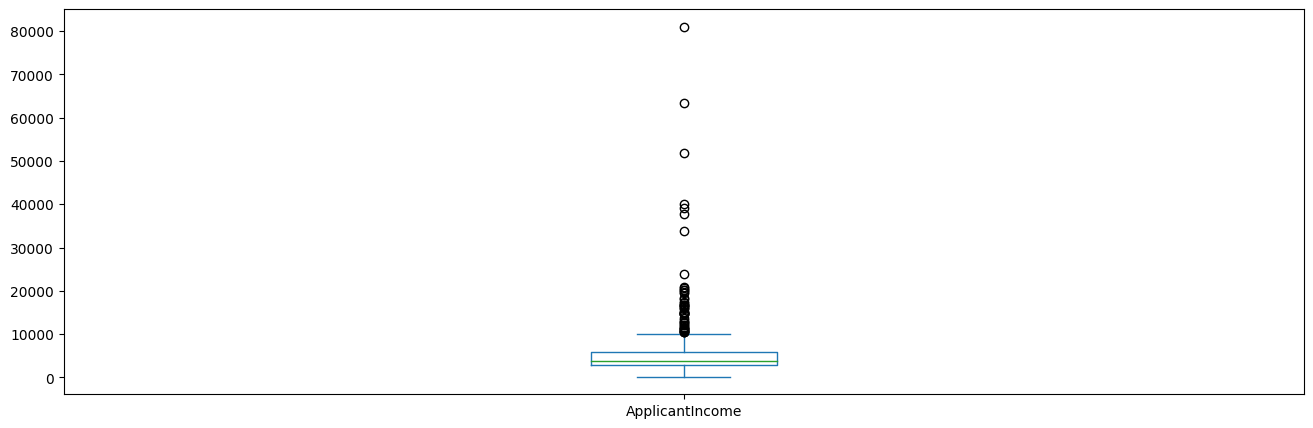

In [ ]:
#VISUALIZING THE APPLICANT INCOME USING DISTANCE PLOT
sns.distplot(train_data['ApplicantIncome'])
plt.show()
train_data['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

As we can see, the visualization in the distribution of applicant income is skewed to the Left and is not Normally Distributed

Text(0.5, 0.98, '')

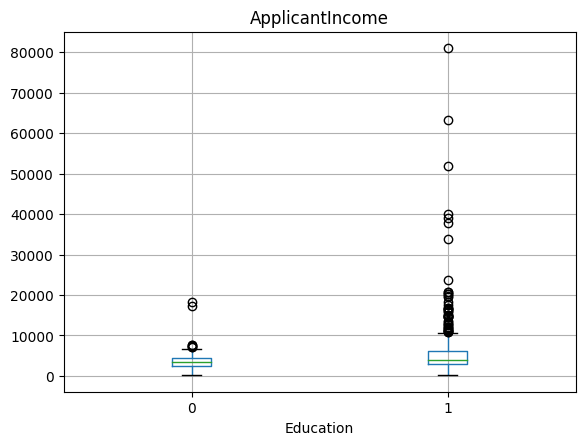

In [ ]:
#NOW LET US VISUALIZE APPLICANT INCOME AGAINST EDUCATION OF THE APPLICANTS
train_data.boxplot(column='ApplicantIncome',by = 'Education')
plt.suptitle("")

The visualization infers that some of the Graduates have very high Income, which are appearing to be Outliers.

<ipython-input-44-fffa60896cbe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['CoapplicantIncome'])


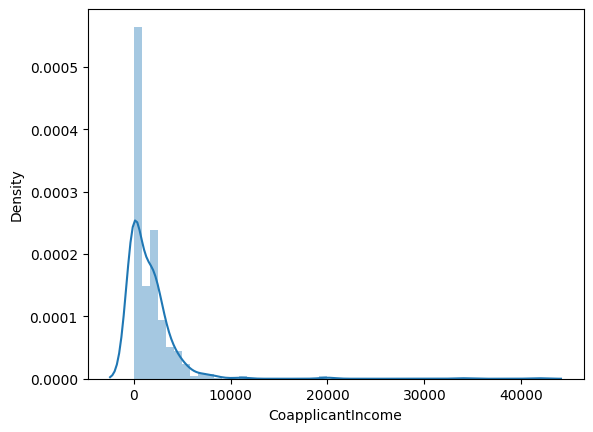

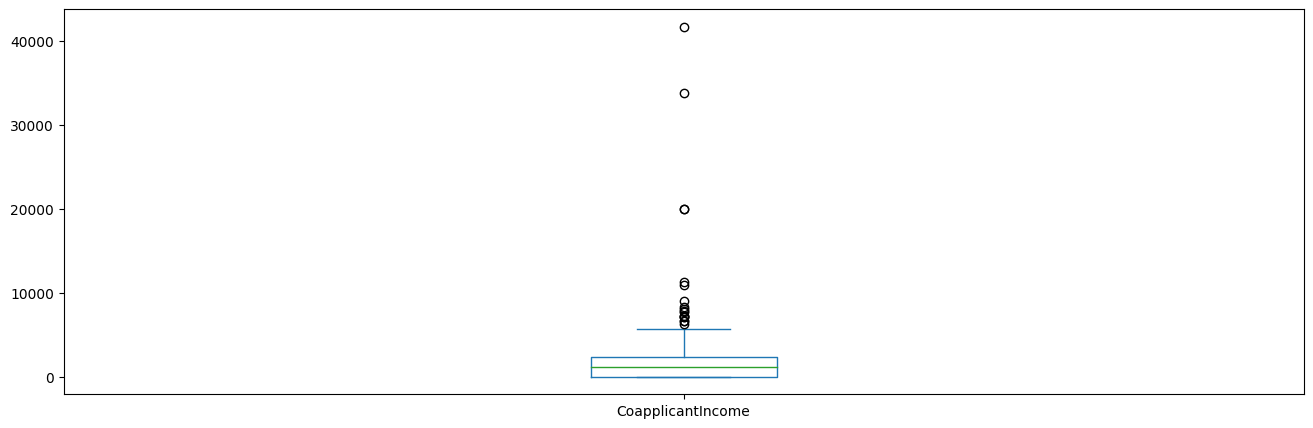

In [ ]:
# CO-APPLICANT INCOME DISTRIBUTION
sns.distplot(train_data['CoapplicantIncome'])
plt.show()
train_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

We can also see a lot of Outliers with the coapplicant income.

<Axes: >

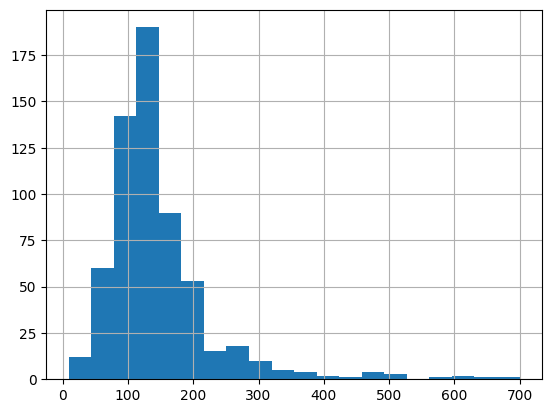

In [ ]:
train_data['LoanAmount'].hist(bins=20)

## **DEALING WITH OUTLIERS**

<Axes: >

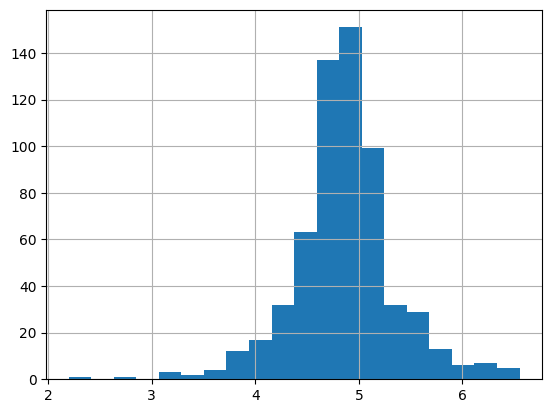

In [ ]:
train_data['LoanAmount_log']=np.log(train_data['LoanAmount'])
train_data['LoanAmount_log'].hist(bins=20)

We have Normalized the Loan Amount Outliers

Now, Let us Concatenate the **'ApplicantIncome'** and **'CoapplicantIncome'** into a common column called **'Total_Income'** and treat the Outliers 

In [ ]:
IncomeList = ['ApplicantIncome','CoapplicantIncome']

In [ ]:
train_data['TotalIncome']=train_data[IncomeList].sum(axis=1)
print(train_data['TotalIncome'])

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: TotalIncome, Length: 614, dtype: float64


In [ ]:
#train_data=train_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

<ipython-input-50-20c8cc364c39>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['TotalIncome'])


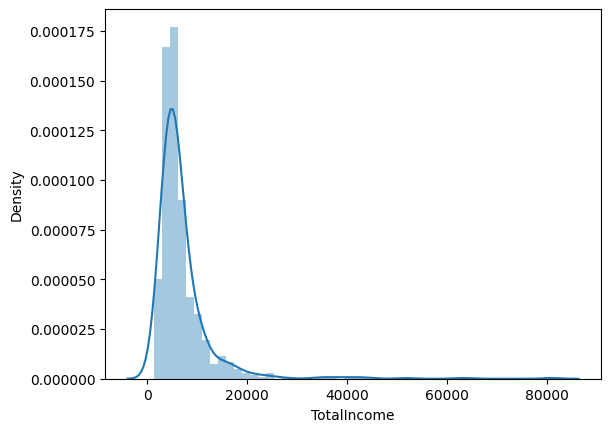

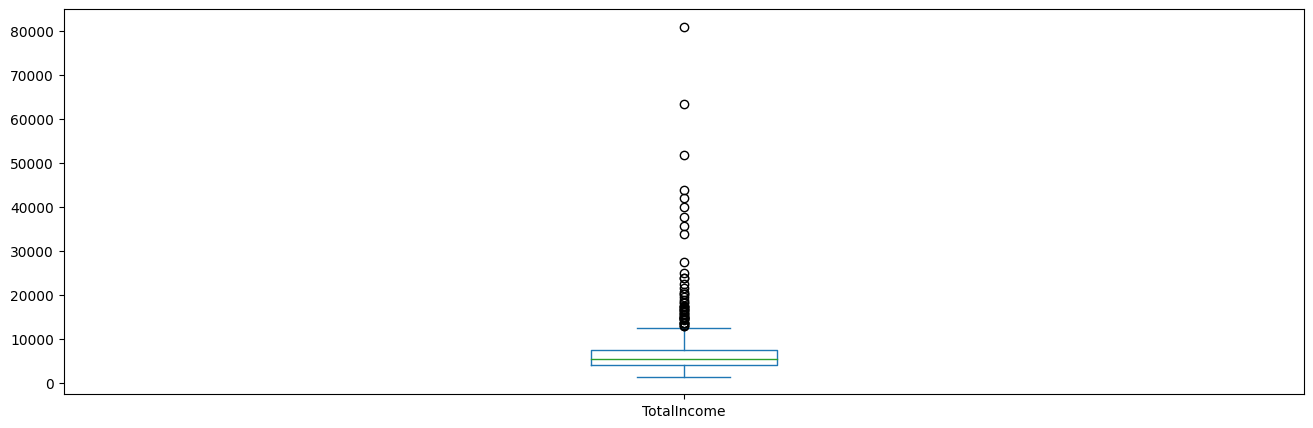

In [ ]:
sns.distplot(train_data['TotalIncome'])
plt.show()
train_data['TotalIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

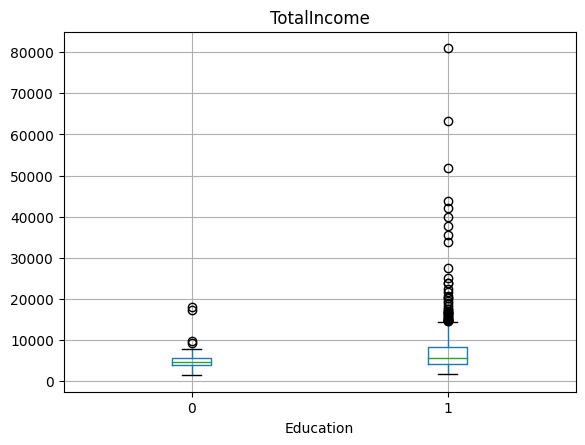

In [ ]:
train_data.boxplot(column='TotalIncome',by = 'Education')
plt.suptitle("")

<Axes: >

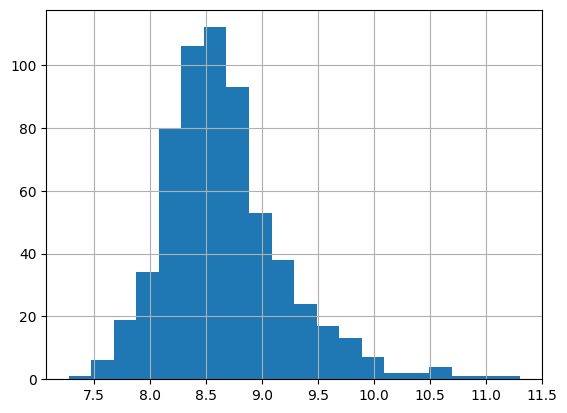

In [ ]:
#TREATING THE OUTLIERS OF 'TotalIncome'
train_data['TotalIncome_log']=np.log(train_data['TotalIncome'])
train_data['TotalIncome_log'].hist(bins=20)

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1,4.852030,5849.0,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1,4.948760,6000.0,8.699515


In [ ]:
train_data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,564.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.842199,1.050489,0.687296,4.857250,7024.705081,8.669414
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.364878,0.840875,0.463973,0.495996,6458.663872,0.545102
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,2.197225,1442.000000,7.273786
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,4.607658,4166.000000,8.334712
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,4.852030,5416.500000,8.597205
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000,5.104426,7521.750000,8.925549
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,6.551080,81000.000000,11.302204


Now, we can see that the **Applicant's Total Income** including the Co applicant's Income is **Normally distributed** and the **Outliers** have been treated.

***DEALING WITH OUTLIERS FOR 'test_data'***

<ipython-input-55-ecb48df3c557>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['ApplicantIncome'])


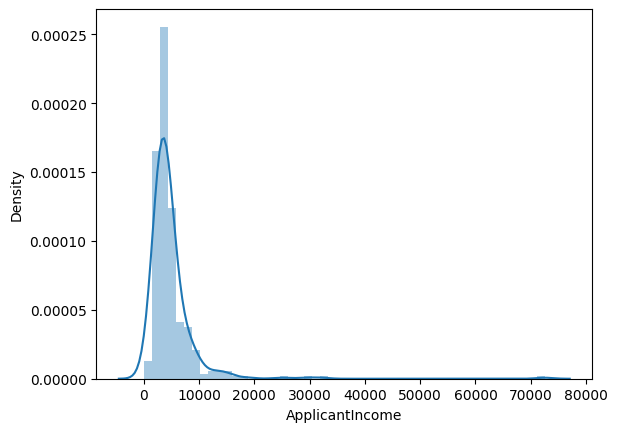

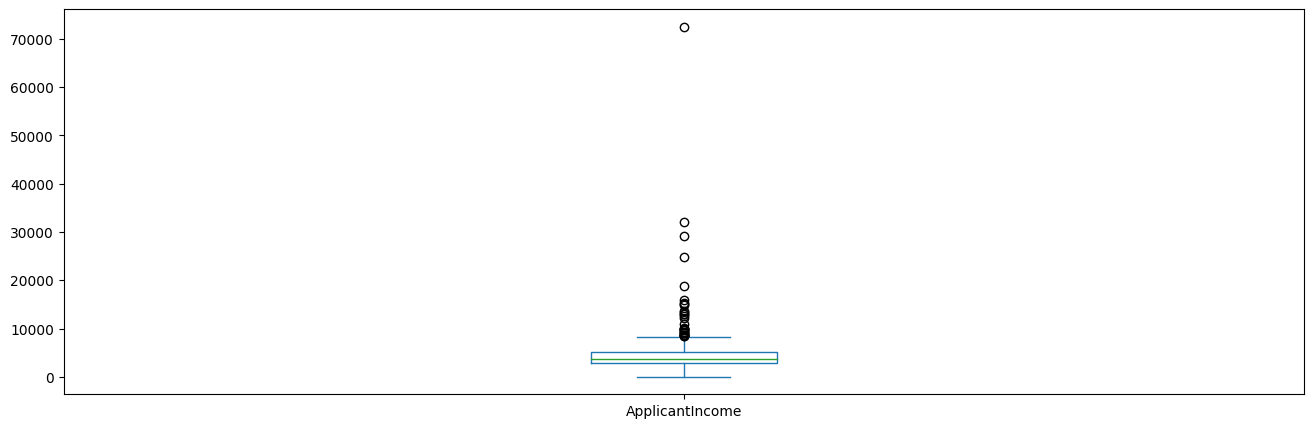

In [ ]:
#VISUALIZING THE APPLICANT INCOME USING DISTANCE PLOT
sns.distplot(test_data['ApplicantIncome'])
plt.show()
test_data['ApplicantIncome'].plot.box(figsize = (16,5))
plt.show()

Text(0.5, 0.98, '')

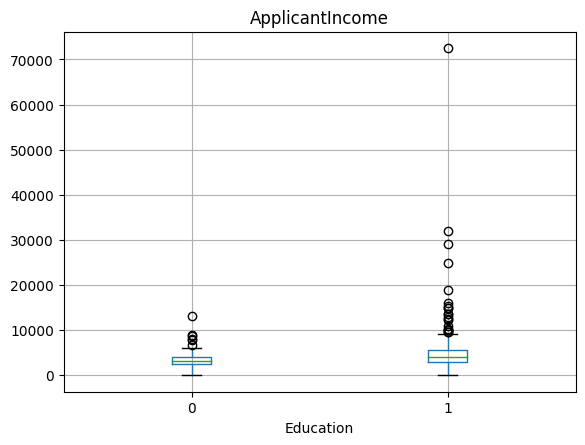

In [ ]:
#NOW LET US VISUALIZE APPLICANT INCOME AGAINST EDUCATION OF THE APPLICANTS
test_data.boxplot(column='ApplicantIncome',by = 'Education')
plt.suptitle("")

<ipython-input-57-1e072e93bb75>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['CoapplicantIncome'])


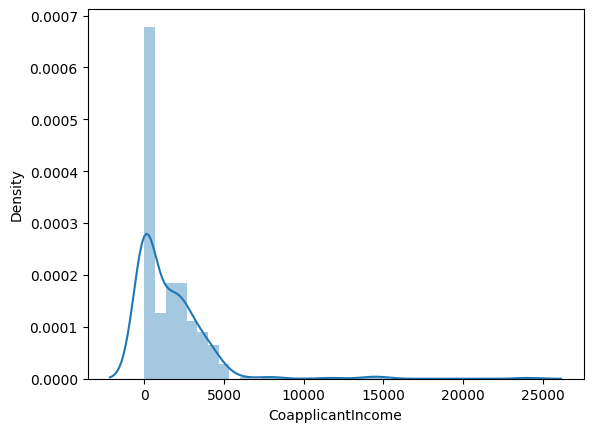

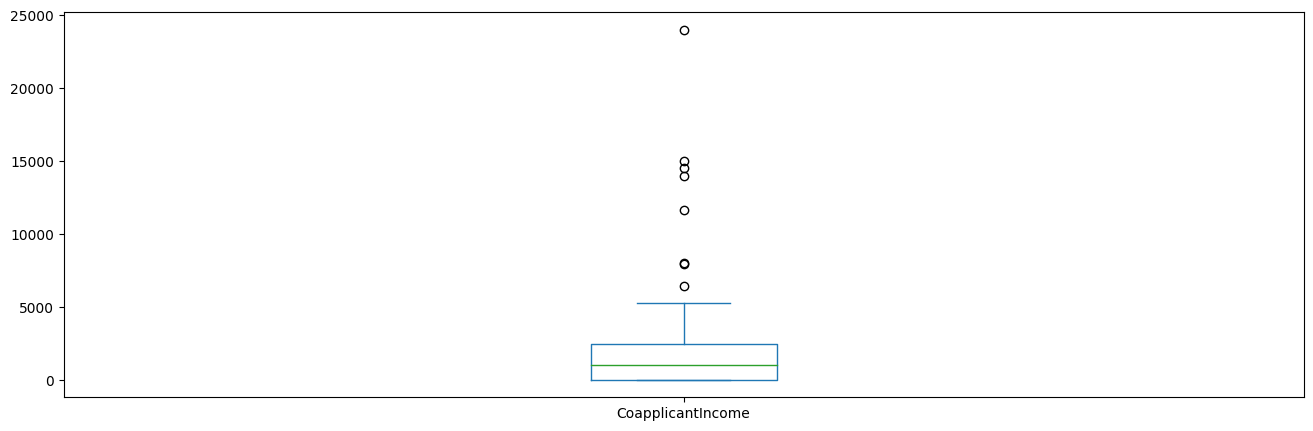

In [ ]:
# CO-APPLICANT INCOME DISTRIBUTION
sns.distplot(test_data['CoapplicantIncome'])
plt.show()
test_data['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
IncomeList = ['ApplicantIncome','CoapplicantIncome']

In [ ]:
test_data['TotalIncome']=test_data[IncomeList].sum(axis=1)

<ipython-input-60-0a33f32c983d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['TotalIncome'])


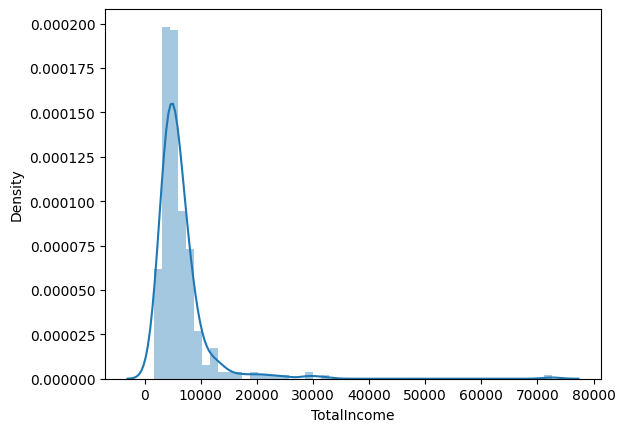

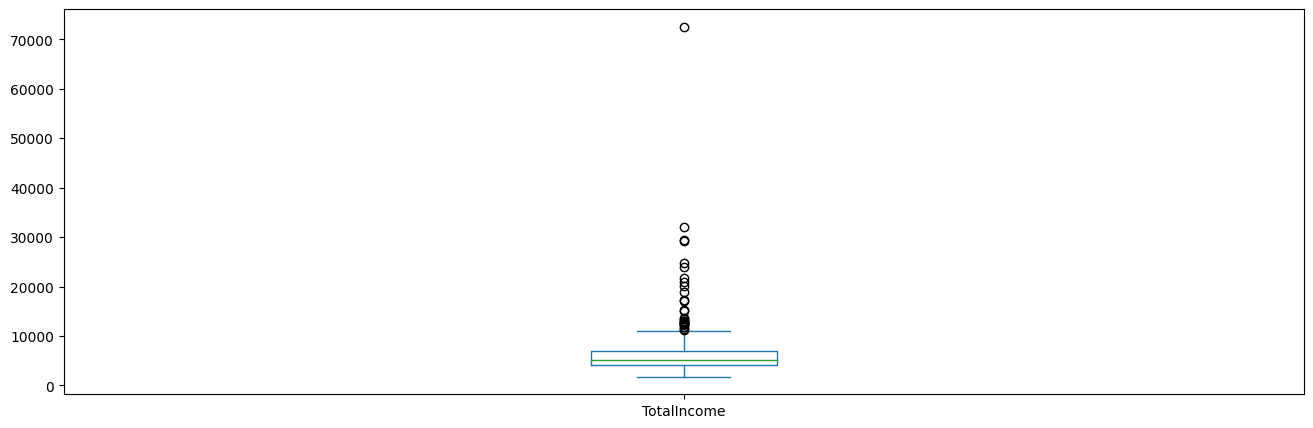

In [ ]:
sns.distplot(test_data['TotalIncome'])
plt.show()
test_data['TotalIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

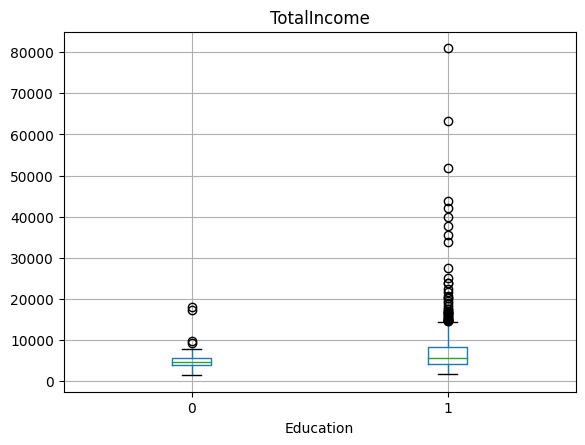

In [ ]:
train_data.boxplot(column='TotalIncome',by = 'Education')
plt.suptitle("")

<Axes: >

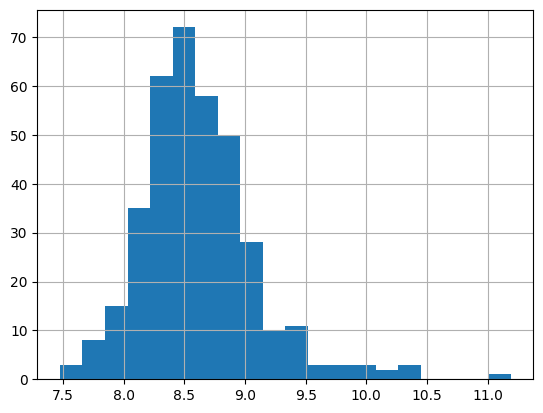

In [ ]:
#TREATING THE OUTLIERS OF 'TotalIncome'
test_data['TotalIncome_log']=np.log(test_data['TotalIncome'])
test_data['TotalIncome_log'].hist(bins=20)

<Axes: >

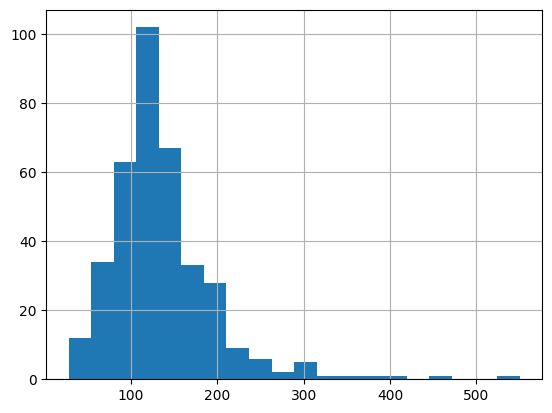

In [ ]:
#REMOVING THE OUTLIERS OF 'LoanAmount'
test_data['LoanAmount'].hist(bins=20)

<Axes: >

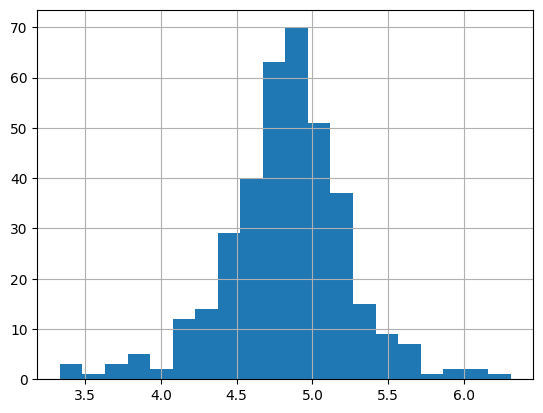

In [ ]:
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])
test_data['LoanAmount_log'].hist(bins=20)

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,0,5720,8.651724,4.700480
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,4576,8.428581,4.836282
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0,6800,8.824678,5.337538
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0.0,0,4886,8.494129,4.605170
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,0,3276,8.094378,4.356709


We have treated the Outliers of Test Data as well

In [ ]:
#REMOVING UNWANTED COLUMNS
#test_data=test_data.drop(['TotalIncome','LoanAmount'],axis=1)

In [ ]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'TotalIncome',
       'TotalIncome_log', 'LoanAmount_log'],
      dtype='object')

**BIVARIATE ANALYSIS**

ANALYZING CATEGORICAL VARIABLES AGAINST TARGET VARIABLE

<Axes: xlabel='Gender'>

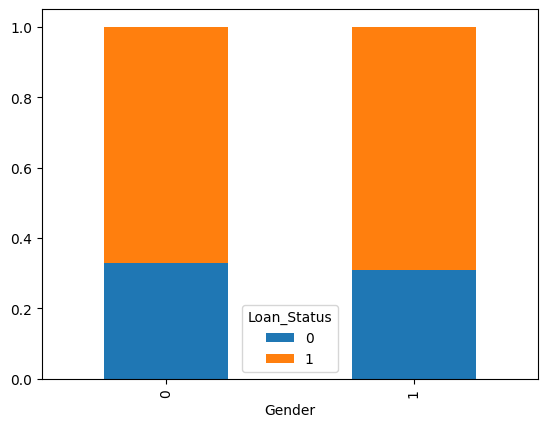

In [ ]:
Gender = pd.crosstab(train_data['Gender'],train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)

The proportion of **Male** and **Female** applicants are more or less the same for both **approved** and **unapproved loans**

<Axes: xlabel='Married'>

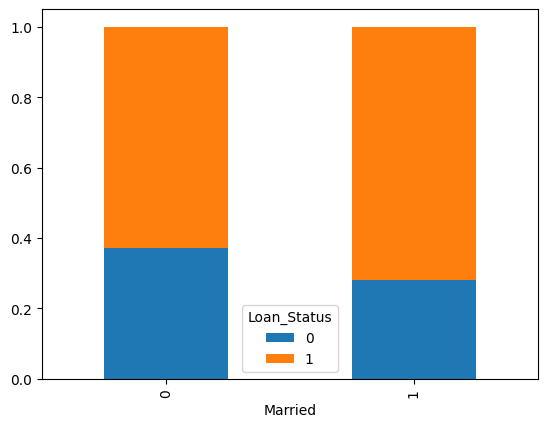

In [ ]:
Married = pd.crosstab(train_data['Married'],train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)

As the Visualization displays that **Married people** are more capable for a loan approval than **Unmarried people**

<Axes: xlabel='Dependents'>

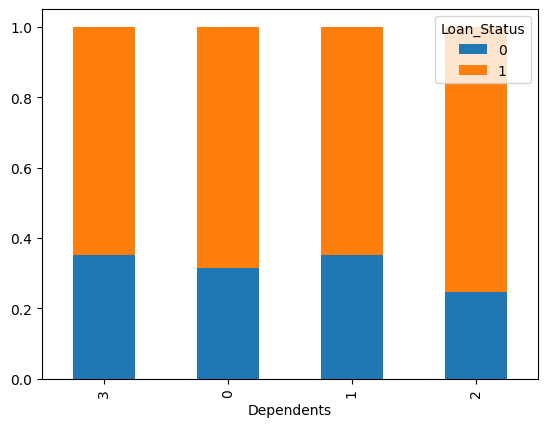

In [ ]:
Dependents = pd.crosstab(train_data['Dependents'],train_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=True
)


People with **2 Dependents** have a higher chance of a Loan Approval as compared to **1** and **3 Dependents**.

<Axes: xlabel='Education'>

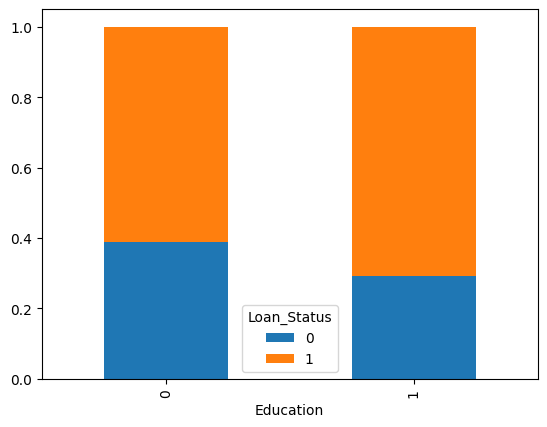

In [ ]:
Education = pd.crosstab(train_data['Education'],train_data['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)

**Graduates** have a higher chance of getting their Loan Approved than **Non-Graduates**

<Axes: xlabel='Self_Employed'>

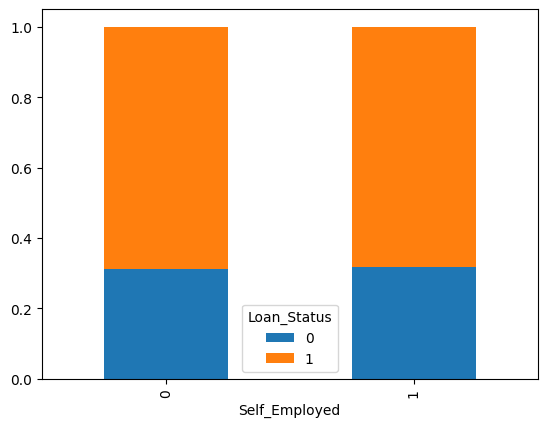

In [ ]:
Self_Employed = pd.crosstab(train_data['Self_Employed'],train_data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)

There's No pattern visible for **Self_Employed** and **Loan_Status** for Loan Approval

<Axes: xlabel='Credit_History'>

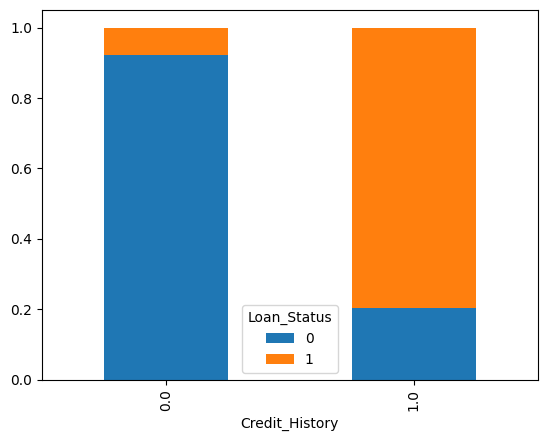

In [ ]:
Credit_History=pd.crosstab(train_data['Credit_History'],train_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)

The **Credit_History** against **Loan_Status** shows a better pattern than any other parameter, inferring that People with a **Credit_History (People who have paid their loans)** have a higher chance of getting their Loan Approved than the People with **No Credit_History**

<Axes: xlabel='Property_Area'>

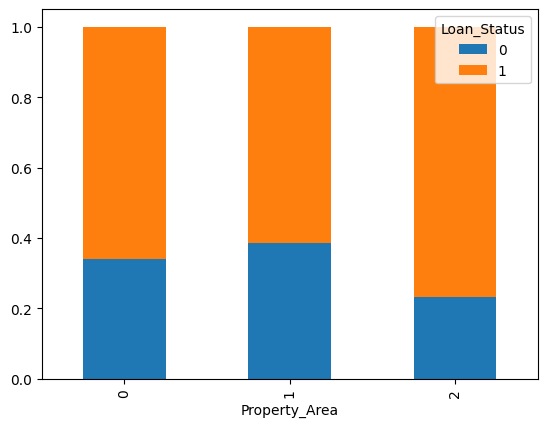

In [ ]:
Property_Area = pd.crosstab(train_data['Property_Area'],train_data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)

People residing in the **Semi-Urban Area** have a higher chance of getting their Loan Approved than the people living in either **Rural Area** or **Urban Area**

**NUMERICAL VALUE VS. TARGET VARIABLE**

<Axes: xlabel='Loan_Status'>

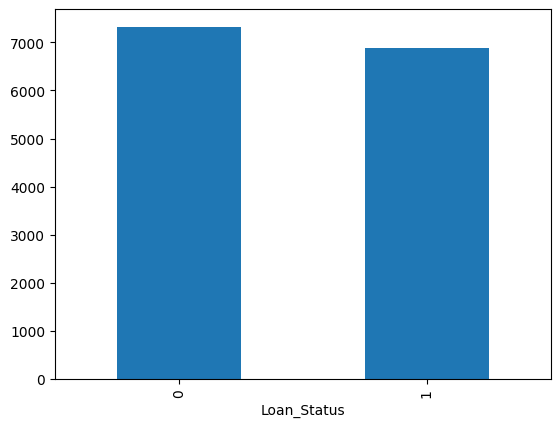

In [ ]:
train_data.groupby('Loan_Status')['TotalIncome'].mean().plot.bar()

There are no changes visible in the Applicant's Mean Income

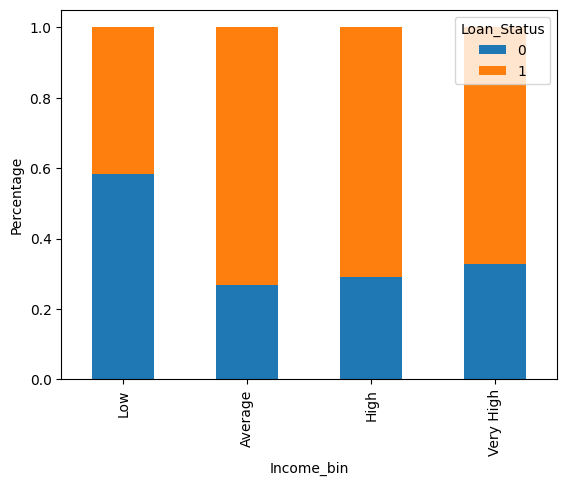

In [ ]:
#Making bins based on Applicant's Income
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train_data['Income_bin']=pd.cut(train_data['TotalIncome'],bins,labels=group)
Income_bin=pd.crosstab(train_data['Income_bin'],train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked=True
)
plt.xlabel='Applicants_Total_Income'
P=plt.ylabel('Percentage')
                               

The Applicant's Total Income does not majorly affect the Loan Approval as the **Average** and **High Income** applicants tend to get their **Loan Approved** as compared to Applicant's with **Very High Income**. However, Applicant's with **Low Income** have a **disadvantage** as their income affects their Loan Approval. **But the pattern contradicts our Assumption that Applicant's with Very High Income level have a very high Loan Approval ratio.**

<Axes: xlabel='LoanAmount_bin'>

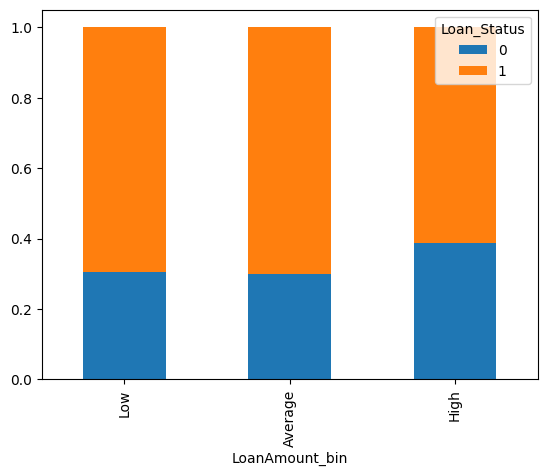

In [ ]:
bins=[0,100,200,700]
group = ['Low','Average','High']
train_data['LoanAmount_bin']=pd.cut(train_data['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'],train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(
    kind='bar',stacked='True'
)

The pattern above shows that the Loan will be Approved if the Loan Amount is Low or Average as compared to the High Loan Amount. 

This proves that the chances of Loan Approval will be high if the Loan Amount is Less 

In [ ]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome', 'TotalIncome_log', 'Income_bin',
       'LoanAmount_bin'],
      dtype='object')

In [ ]:
train_data=train_data.drop(['Income_bin','LoanAmount_bin','TotalIncome'],axis=1)

In [ ]:
#train_data=train_data.drop(['TotalIncome','LoanAmount'],axis=1)

In [ ]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'TotalIncome_log'],
      dtype='object')

FEATURE ENGINEERING ON TRAIN DATA

**FINDING THE CORRELATION BETWEEN THE COLUMNS OF TRAIN DATA**

<ipython-input-82-2cc47d923191>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train_data.corr()


<Axes: >

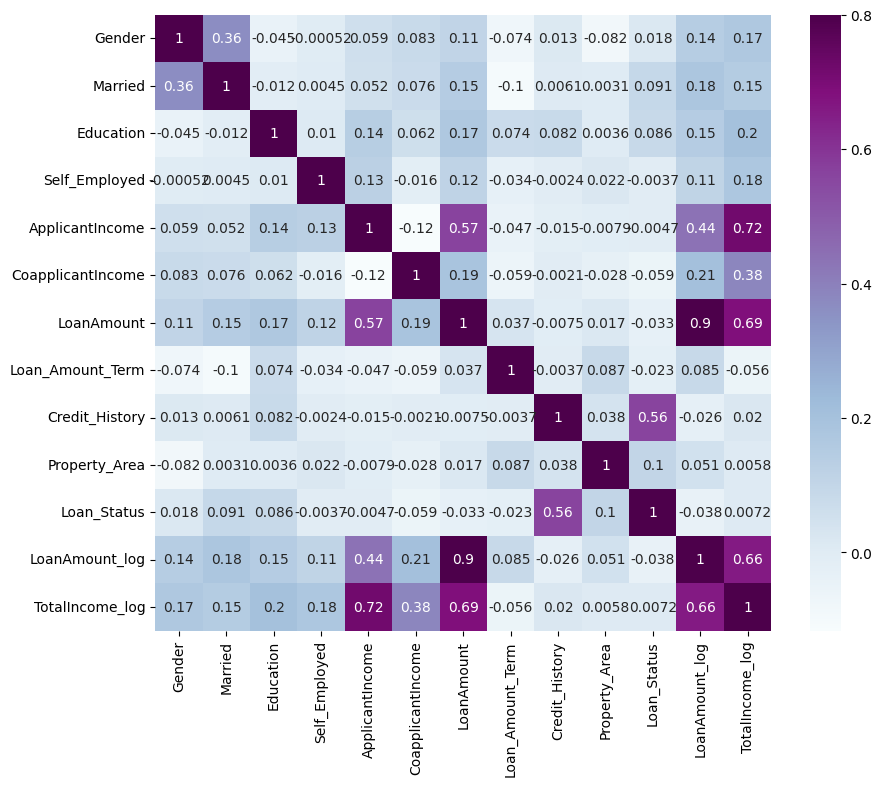

In [ ]:
matrix = train_data.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu',annot = True)

The correlation matrix gives us an insight that the Most Correlated columns are **TotalIncomelog , **Credit_History,Educatio,Married AND Loan_Status**

In [ ]:
train_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1,4.852030,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,4.852030,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1,4.787492,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1,4.948760,8.699515
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1,5.587249,9.170872
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,0,1,4.553877,8.255569
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0,5.062595,8.619750
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,0,1,5.123964,8.618305
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0,5.855072,10.077819


FEATURE ENGINEERING ON TEST DATA

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,0,5720,8.651724,4.700480
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,4576,8.428581,4.836282
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0,6800,8.824678,5.337538
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0.0,0,4886,8.494129,4.605170
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,0,3276,8.094378,4.356709


In [ ]:
train_data['Dependents'].replace('3+',3,inplace=True)
train_data['Credit_History']=train_data['Credit_History'].replace('NaN',0,inplace=True)
train_data['Credit_History'].fillna(0, inplace = True)
test_data['Credit_History']=train_data['Credit_History'].replace('NaN',0,inplace=True)
test_data['Credit_History'].fillna(0, inplace = True)

FEATURE SELECTION

'Gender','Property_Area','Self_Employed','Loan_ID','LoanAmount'--->these axis have no or less impact on loan status hence would be eliminated

***MODEL PREDICTION***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
x= train_data.drop(['LoanAmount_log','Loan_Status','TotalIncome_log','Loan_ID'],axis=1)
Y= train_data['Loan_Status']

In [ ]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size = 0.1,random_state=2)

In [ ]:
model = LogisticRegression(solver='liblinear',random_state=0,C=100)
model.fit(x_train,Y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [ ]:
selected_features = model.coef_[0].nonzero()[0]

# get the column names of the selected features
selected_feature_names = x.columns[selected_features]
print(selected_feature_names )

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area'],
      dtype='object')


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_train, model.predict(x_train)))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       178
           1       0.68      1.00      0.81       374

    accuracy                           0.68       552
   macro avg       0.84      0.51      0.42       552
weighted avg       0.78      0.68      0.56       552



a = train_data['Credit_History']
b = train_data['Loan_Status']

#plot logistic regression curve
sns.regplot(x=a, y=b, data=train_data, logistic=True, ci=None,scatter_kws={'color': 'black'}, line_kws={'color': 'red'})


In [ ]:
X_train_predict=model.predict(x_train)

In [ ]:
score = accuracy_score(X_train_predict,Y_train) #gives accuracy score of predicting on train data

In [ ]:
X_test_predict=model.predict(x_test)
score_test = accuracy_score(X_test_predict,Y_test)

In [ ]:
print(score_test*100)

77.41935483870968


In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelR=RandomForestClassifier(max_depth=100,random_state=24,n_estimators=500,min_samples_leaf=1,bootstrap=True,n_jobs=-1)
modelR.fit(x_train,Y_train)

RandomForestClassifier(max_depth=100, n_estimators=500, n_jobs=-1,
                       random_state=24)

In [ ]:
X_test_predictR=modelR.predict(x_test)
score_te= accuracy_score(X_test_predictR,Y_test)

In [ ]:
print(score_te*100)

74.19354838709677


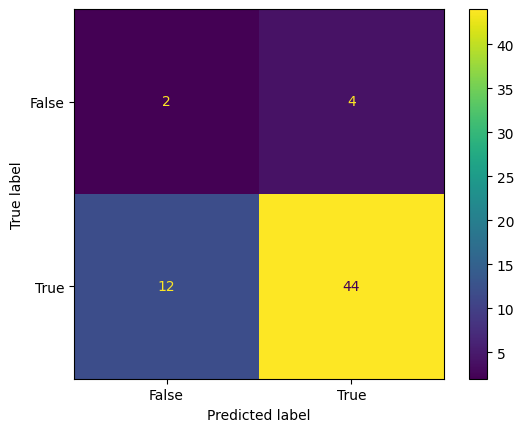

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(X_test_predictR,Y_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
#TESTING OUTPUT 
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,0,0,5720,8.651724,4.700480
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,0,0,4576,8.428581,4.836282
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,0,0,6800,8.824678,5.337538
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,0,0,4886,8.494129,4.605170
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,0,0,3276,8.094378,4.356709


In [ ]:
test_data["Loan_ID"]=test_data["Loan_ID"].str[4:]

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log
0,1015,1,1,0,1,0,5720,0,110.0,360.0,0,0,5720,8.651724,4.700480
1,1022,1,1,1,1,0,3076,1500,126.0,360.0,0,0,4576,8.428581,4.836282
2,1031,1,1,2,1,0,5000,1800,208.0,360.0,0,0,6800,8.824678,5.337538
3,1035,1,1,2,1,0,2340,2546,100.0,360.0,0,0,4886,8.494129,4.605170
4,1051,1,0,0,0,0,3276,0,78.0,360.0,0,0,3276,8.094378,4.356709


In [ ]:
test_data=test_data.drop(['TotalIncome','TotalIncome_log','LoanAmount_log'],axis=1)

In [ ]:
test_data=test_data.set_index('Loan_ID')

In [ ]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
1015,1,1,0,1,0,5720,0,110.0,360.0,0,0
1022,1,1,1,1,0,3076,1500,126.0,360.0,0,0
1031,1,1,2,1,0,5000,1800,208.0,360.0,0,0
1035,1,1,2,1,0,2340,2546,100.0,360.0,0,0
1051,1,0,0,0,0,3276,0,78.0,360.0,0,0


In [ ]:
userid=input("enter last 4 digits of ur load id")

enter last 4 digits of ur load id1035


In [ ]:
result=test_data.loc[userid]      

In [ ]:
print(result)

Gender                   1
Married                  1
Dependents               2
Education                1
Self_Employed            0
ApplicantIncome       2340
CoapplicantIncome     2546
LoanAmount           100.0
Loan_Amount_Term     360.0
Credit_History           0
Property_Area            0
Name: 1035, dtype: object


In [ ]:
input_data=(result)
input_data_array=np.asarray(input_data)
in_data=input_data_array.reshape(1,-1)
prediction=modelR.predict(in_data)
#print(prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if(prediction==1):
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Approved
